In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline

In [1]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         path=os.path.join(dirname, filename)
#         if 'train' in path:
#             training_path=path
#         elif 'test' in path:
#             test_path=path

In [3]:
training_path = 'train.csv'
test_path = 'test.csv'

In [9]:
train_ori = pd.read_csv(training_path)
test = pd.read_csv(test_path)

In [14]:
# Creating validation set
train, val = train_test_split(train_ori, test_size=0.2, random_state=42)
train.shape, val.shape

((1168, 81), (292, 81))

### 1. **Exploratory Data Analysis**

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [18]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Features numéricos contínuos que se referem a dimensões / área (em pés / pés quadrados) (18):
- 'LotFrontage': Pés lineares da rua conectados à propriedade;
- 'LotArea': Área do lote;
- 'MasVnrArea': Área de alvenaria;
- 'BsmtFinSF1': Área acabada do porão (do primeiro tipo);
- 'BsmtFinSF2': Área acabada do porão (do segundo tipo, se mais de um);
- 'BsmtUnfSF': Área não acabada do porão;
- 'TotalBsmtSF': Área total do porão;
- '1stFlrSF': Área do primeiro andar;
- '2ndFlrSF': Área do segundo andar;
- 'LowQualFinSF': Área com acabamento de baixa qualidade (todos os andares);
- 'GrLivArea': Área útil acima do nível solo;
- 'GarageArea': Área da garagem;
- 'WoodDeckSF': Área do deck de madeira;
- 'OpenPorchSF': Área de varanda aberta;
- 'EnclosedPorch': Área de varanda fechada;
- '3SsnPorch': Área da varanda de três temporadas;
- 'ScreenPorch': Área da tela da varanda;
- 'PoolArea': Área da piscina;

Features numéricos contínuos de valores monetários (1):
- 'MiscVal': Valor monetário de características diversas não incluídas em outras categorias;

Features numéricos discretos de quantidades de alguma característica da casa (9):
- 'BsmtFullBath': Banheiros completos no porão;
- 'BsmtHalfBath': Lavabos no porão;
- 'FullBath': Banheiros completos acima do nível do solo;
- 'HalfBath': Lavabos completos acima do nível do solo;
- 'BedroomAbvGr': Quartos acima do nível do solo (não inclui quartos no subsolo);
- 'KitchenAbvGr': Cozinhas acima do nível do solo;
- 'TotRmsAbvGrd': Total de cômodos acima do nível do solo (não inclui banheiros);
- 'Fireplaces': Número de lareiras;
- 'GarageCars': Capacidade da garagem (número de carros);

Features numéricos discretos relacionados a datas (5) (exceção para 'GarageYrBlt', que possui valores contínuos):
- 'YearBuilt': Ano de construção da casa;
- 'YearRemodAdd': Ano da reforma da casa (mesma do ano da construção de não houver);
- 'GarageYrBlt': Ano de construção da garagem;
- 'MoSold': Mês de venda;
- 'YrSold': Ano de venda;

Features categóricos ordinais (22):
- 'LotShape': Formato geral do lote (regular, ligeiramente irregular, moderadamente irregular, irregular);
- 'Utilities': Utilidades disponíveis (de apenas eletricidade a todas);
- 'LandSlope': Inclinação do terreno (3 níveis);
- 'OverallQual': Qualidade geral da casa (de 0 a 10);
- 'OverallCond': Condições gerais da cada (de 0 a 10);
- 'ExterQual': Qualidade do material no exterior (5 níveis);
- 'ExterCond': Avaliação a condição atual do material no exterior (5 níveis);
- 'BsmtQual': Avaliação a altura do porão (5 níveis);
- 'BsmtCond': Avaliação do estado geral do porão (5 níveis);
- 'BsmtFinType1': Classificação da área acabada do porão (6 níveis + NA);
- 'BsmtFinType2': Classificação da área acabada do porão (para o segundo tipo, se mais de um) (6 níveis + NA);
- 'BsmtExposure': Avaliação da exposição externa do porão;
- 'HeatingQC': Qualidade e condição do aquecimento (5 níveis);
- 'KitchenQual': Qualidade da cozinha (5 níveis);
- 'Functional': Funcionalidade inicial (presuma típica, a menos que as deduções sejam garantidas) (8 níveis);
- 'FireplaceQu': Qualidade da lareira (5 níveis + NA);
- 'GarageFinish': Estado do acabamento interior da garagem (acabado, mal acabado, não acabado, sem garagem, NA);
- 'GarageQual': Qualidade da garagem (5 níveis + NA);
- 'GarageCond': Condição da garagem (5 níveis + NA);
- 'PavedDrive': Pavimento da pista até a garagem (pavimentado, parcialmente pavimentado, sem pavimento/cascalho);
- 'PoolQC': Qualidade da piscina (4 níveis + NA);
- 'Fence': Qualidade da cerca (4 níveis + NA);

Features categóricos nominais (24):
- 'Street': Tipo de estrada de acesso à propriedade (pavimentada ou de cascalho);
- 'Alley': Tipo de acesso à propriedade (pavimentada, de cascalho ou NA);
- 'MSSubClass': Classificação do tipo de imóvel;
- 'MSZoning': Classificação geral do zoneamento (Comercial, Agricultural, Residencial de média densidade, etc);
- 'LandContour': Tipo de nivelamento do terreno da propriedade;
- 'LotConfig': Configuração do lote (ex: esquina, dentro do lote, etc.);
- 'Neighborhood': Bairro;
- 'Condition1': Proximidade a alguma via específica (ex: Adjacente à Ferrovia Norte-Sul);
- 'Condition2': Idem a anterior, se mais de uma;
- 'BldgType': Tipo de moradia (ex: duplex, unidade interna da casa geminada, etc.);
- 'HouseStyle': Estilo de moradia (ex: casa térrea, sobrado, etc.). Semelhante a MSSubClass, mas menos detalhado;
- 'RoofStyle': Tipo de telhado;
- 'RoofMatl': Material do telhado;
- 'Exterior1st': Tipo de acabamento exterior;
- 'Exterior2nd': Idem a anterior, se mais de um;
- 'MasVnrType': Tipo da cobertura da alvenaria;
- 'Foundation': Tipo de fundação;
- 'Heating': Tipo de aquecimento;
- 'CentralAir': Ar condicionado central (sim ou não);
- 'Electrical': Sistema elétrico;
- 'GarageType': Localização da garagem em relação a casa;
- 'MiscFeature': Características diversas não incluídas em outras categorias;
- 'SaleType': Tipo de venda (tipo de garantia, tipo de contrato);
- 'SaleCondition': Condição de venda (ex: normal, venda entre membros de família, etc.).

In [29]:
num_continua = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea',
                'MiscVal']
len(num_continua)

19

In [30]:
num_disc_house = ['BsmtFullBath',
                'BsmtHalfBath',
                'FullBath',
                'HalfBath',
                'BedroomAbvGr',
                'KitchenAbvGr',
                'TotRmsAbvGrd',
                'Fireplaces',
                'GarageCars',]
len(num_disc_house)

9

In [31]:
num_disc_year = ['YearBuilt',
                'YearRemodAdd',
                'GarageYrBlt',
                'MoSold',
                'YrSold',]
len(num_disc_year)

5

In [32]:
cat_ordinal = [ 'LotShape',
                'Utilities',
                'LandSlope',
                'OverallQual',
                'OverallCond',
                'ExterQual',
                'ExterCond',
                'BsmtQual',
                'BsmtCond',
                'BsmtFinType1',
                'BsmtFinType2',
                'BsmtExposure',
                'HeatingQC',
                'KitchenQual',
                'Functional',
                'FireplaceQu',
                'GarageFinish',
                'GarageQual',
                'GarageCond',
                'PavedDrive',
                'PoolQC',
                'Fence',]
len(cat_ordinal)

22

In [33]:
cat_nominal = [ 'Street',
                'Alley',
                'MSSubClass',
                'MSZoning',
                'LandContour',
                'LotConfig',
                'Neighborhood',
                'Condition1',
                'Condition2',
                'BldgType',
                'HouseStyle',
                'RoofStyle',
                'RoofMatl',
                'Exterior1st',
                'Exterior2nd',
                'MasVnrType',
                'Foundation',
                'Heating',
                'CentralAir',
                'Electrical',
                'GarageType',
                'MiscFeature',
                'SaleType',
                'SaleCondition',]
len(cat_nominal)

24

Vamos ver como as features numéricas contínuas se relacionam com a variavel target (SalePrice)

In [66]:
def plot_numeric(feature_list, df):
    m, n = len(feature_list), 2
    fig, ax = plt.subplots(m, n)
    for i, feature in enumerate(feature_list):
        _ = sns.distplot(df[feature], kde=False, ax=ax[i][0])
        _ = sns.regplot(x=df[feature], y=df['SalePrice'], ax=ax[i][1])
    plt.show()

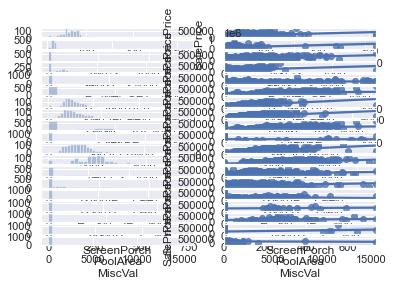

In [67]:
plot_numeric(num_continua, train)

In [8]:
df_num = train[quantitative]

In [19]:
df_cat = train[categorical]

In [9]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
train[quantitative].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [52]:
train[quantitative].describe().transpose()['max'].sort_values()

HalfBath              2.0
BsmtHalfBath          2.0
FullBath              3.0
Fireplaces            3.0
KitchenAbvGr          3.0
BsmtFullBath          3.0
GarageCars            4.0
BedroomAbvGr          8.0
OverallCond           9.0
OverallQual          10.0
MoSold               12.0
TotRmsAbvGrd         14.0
MSSubClass          190.0
LotFrontage         313.0
ScreenPorch         480.0
3SsnPorch           508.0
OpenPorchSF         547.0
EnclosedPorch       552.0
LowQualFinSF        572.0
PoolArea            738.0
WoodDeckSF          857.0
GarageArea         1418.0
BsmtFinSF2         1474.0
MasVnrArea         1600.0
GarageYrBlt        2010.0
YrSold             2010.0
YearRemodAdd       2010.0
YearBuilt          2010.0
2ndFlrSF           2065.0
BsmtUnfSF          2336.0
1stFlrSF           4692.0
GrLivArea          5642.0
BsmtFinSF1         5644.0
TotalBsmtSF        6110.0
MiscVal           15500.0
LotArea          215245.0
SalePrice        755000.0
Name: max, dtype: float64

Some quantitative features maybe are categories, such as OverallQual and OverallCond. Lets keep separate.

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

KeyboardInterrupt: 

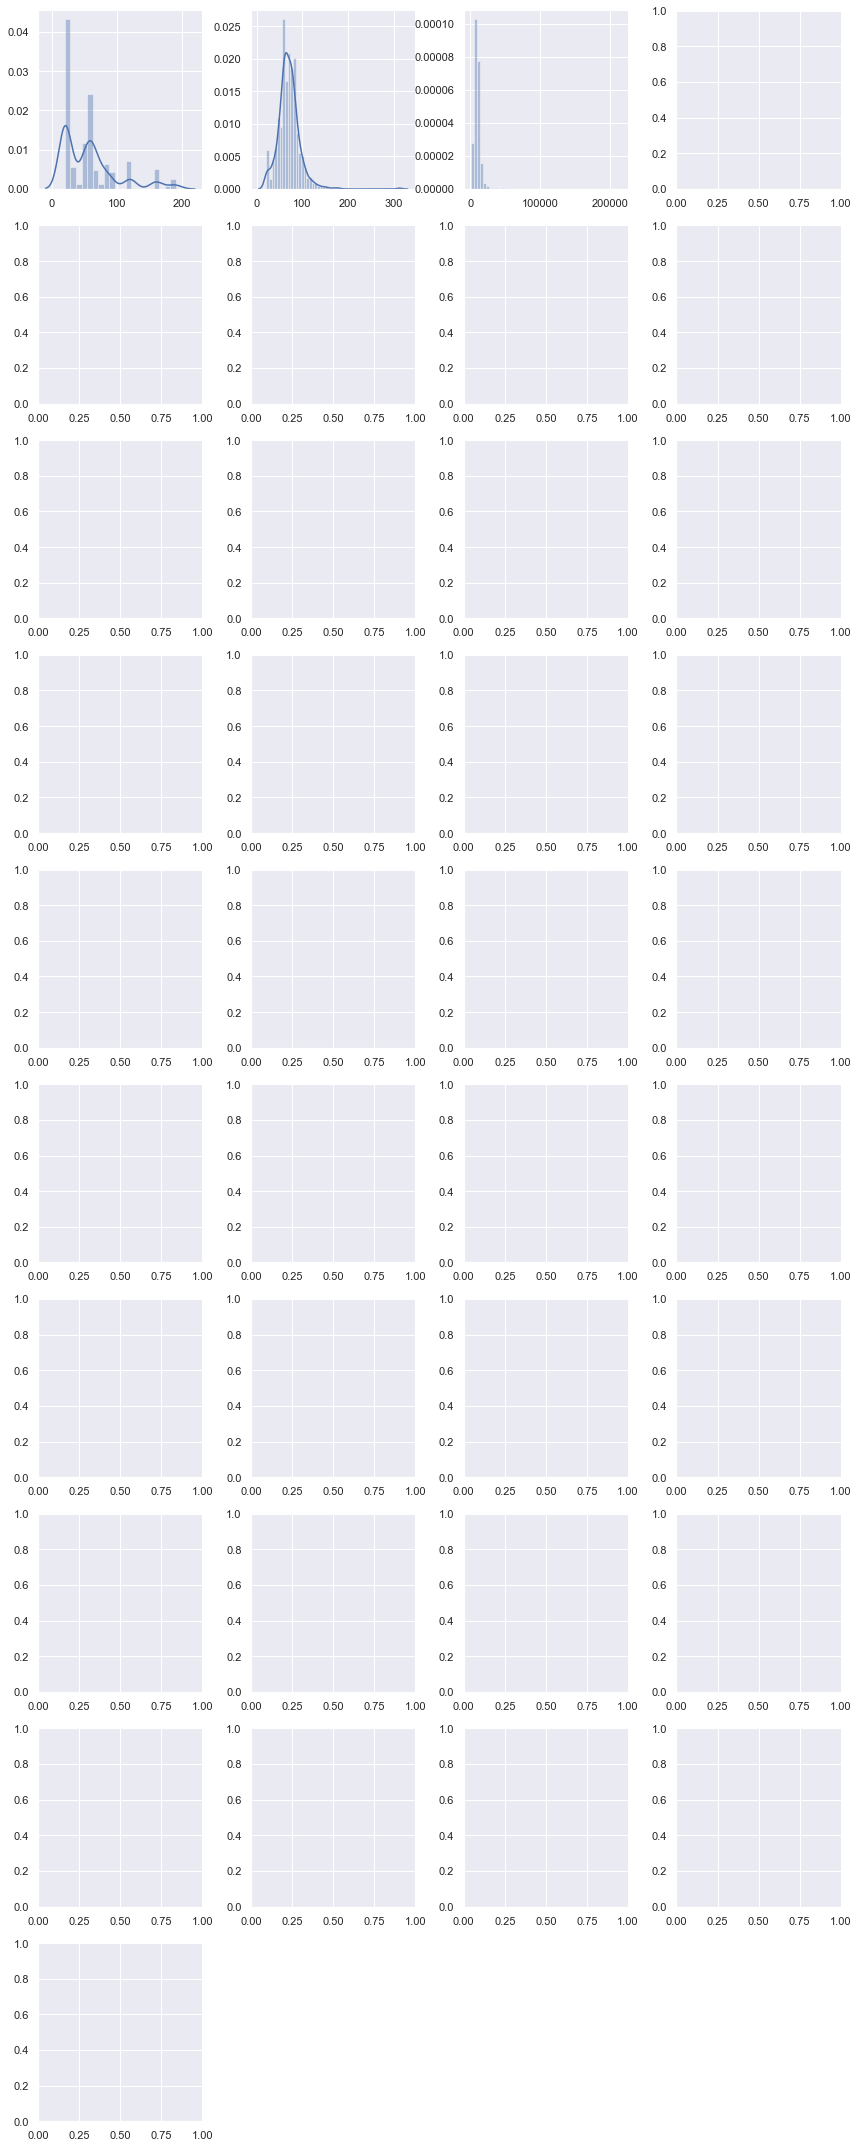

In [45]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## Missing Values

In [22]:
missing = train.isna().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)

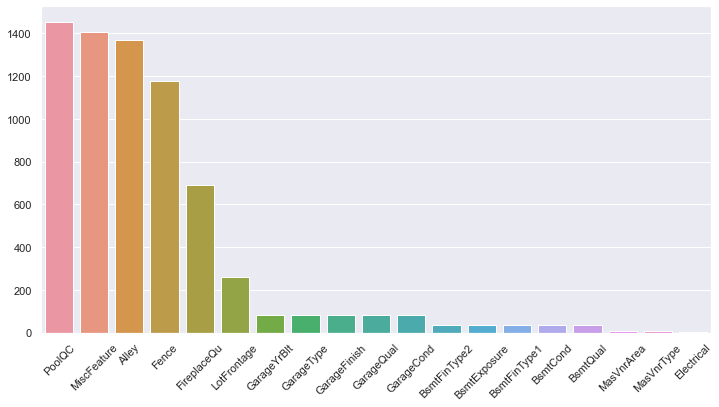

In [23]:
f, ax = plt.subplots(figsize=(12,6))
chart = sns.barplot(x=missing.index, y=missing.values)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Percentage of missing values from the entire number of samples

In [24]:
((missing / train.shape[0]) * 100)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

These are the variables with the highest number of missing values
* PoolQC: Pool quality
* MiscFeature: Miscellaneous feature not covered in other categories
* Alley: Type of alley access to property
* Fence: Fence quality
* FireplaceQu: Fireplace quality
* LotFrontage: Linear feet of street connected to property

I am going to discard the variables with more than 40% of missing values.

**How do missing values affect the dependent variable: SalePrice?**

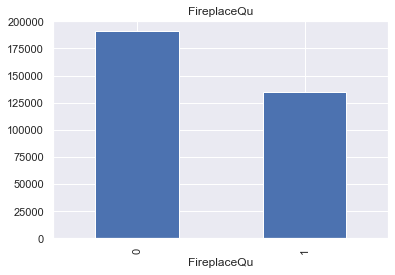

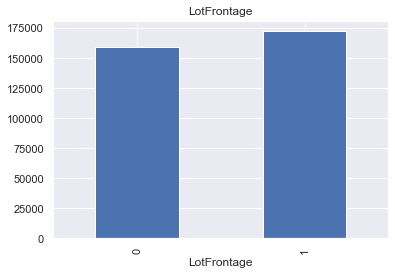

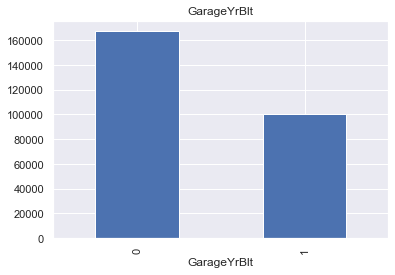

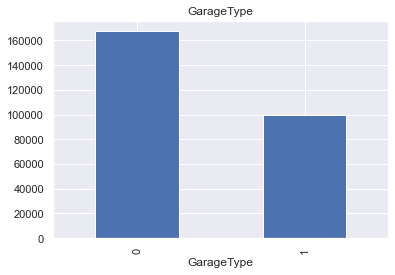

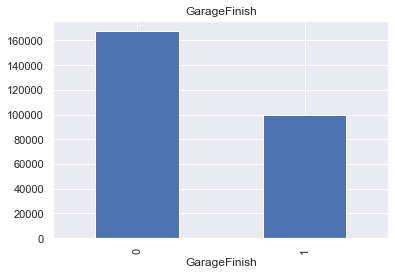

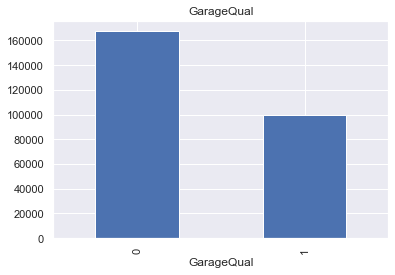

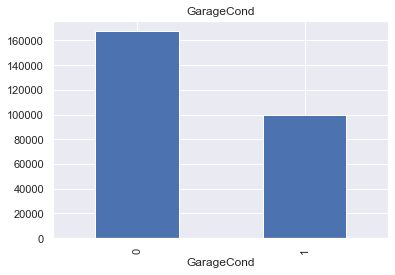

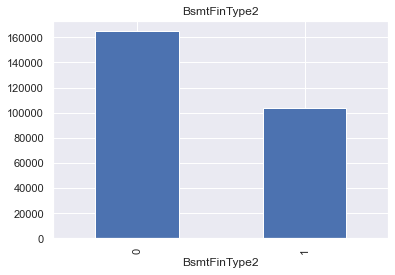

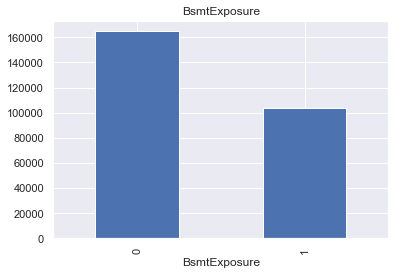

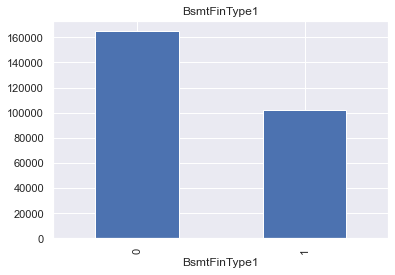

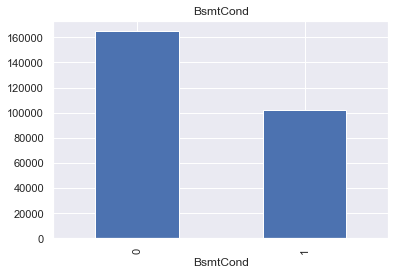

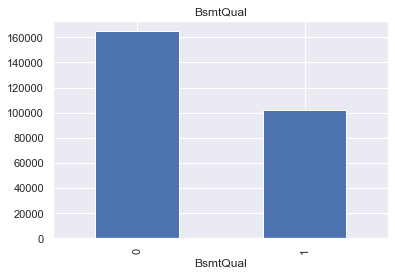

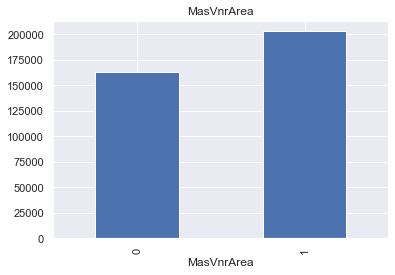

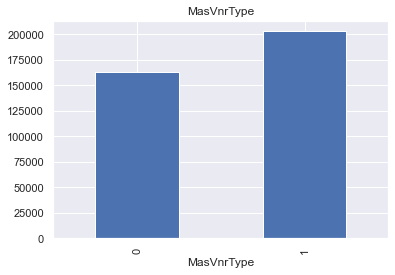

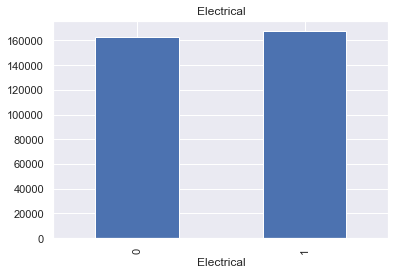

In [32]:
for column in missing[4:].index:
    data = train.copy()
    samples = np.where(data[column].isna(), 1, 0)
    data[column] = samples
    data.groupby(column)['SalePrice'].median().plot.bar()
    plt.title(column)
    plt.show()

In [40]:
train[missing[4:].index]

,FireplaceQu,LotFrontage,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,NaN,65.0,2003.0,Attchd,RFn,TA,TA,Unf,No,GLQ,TA,Gd,196.0,BrkFace,SBrkr
1,TA,80.0,1976.0,Attchd,RFn,TA,TA,Unf,Gd,ALQ,TA,Gd,0.0,None,SBrkr
2,TA,68.0,2001.0,Attchd,RFn,TA,TA,Unf,Mn,GLQ,TA,Gd,162.0,BrkFace,SBrkr
3,Gd,60.0,1998.0,Detchd,Unf,TA,TA,Unf,No,ALQ,Gd,TA,0.0,None,SBrkr
4,TA,84.0,2000.0,Attchd,RFn,TA,TA,Unf,Av,GLQ,TA,Gd,350.0,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,62.0,1999.0,Attchd,RFn,TA,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr
1456,TA,85.0,1978.0,Attchd,Unf,TA,TA,Rec,No,ALQ,TA,Gd,119.0,Stone,SBrkr
1457,Gd,66.0,1941.0,Attchd,RFn,TA,TA,Unf,No,GLQ,Gd,TA,0.0,None,SBrkr
1458,NaN,68.0,1950.0,Attchd,Unf,TA,TA,Rec,Mn,GLQ,TA,TA,0.0,None,FuseA


In [41]:
quantitative = train.dtypes[train.dtypes != 'object'].index

In [42]:
pd.melt(train, value_vars=quantitative)

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
54015,SalePrice,175000.0
54016,SalePrice,210000.0
54017,SalePrice,266500.0
54018,SalePrice,142125.0


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

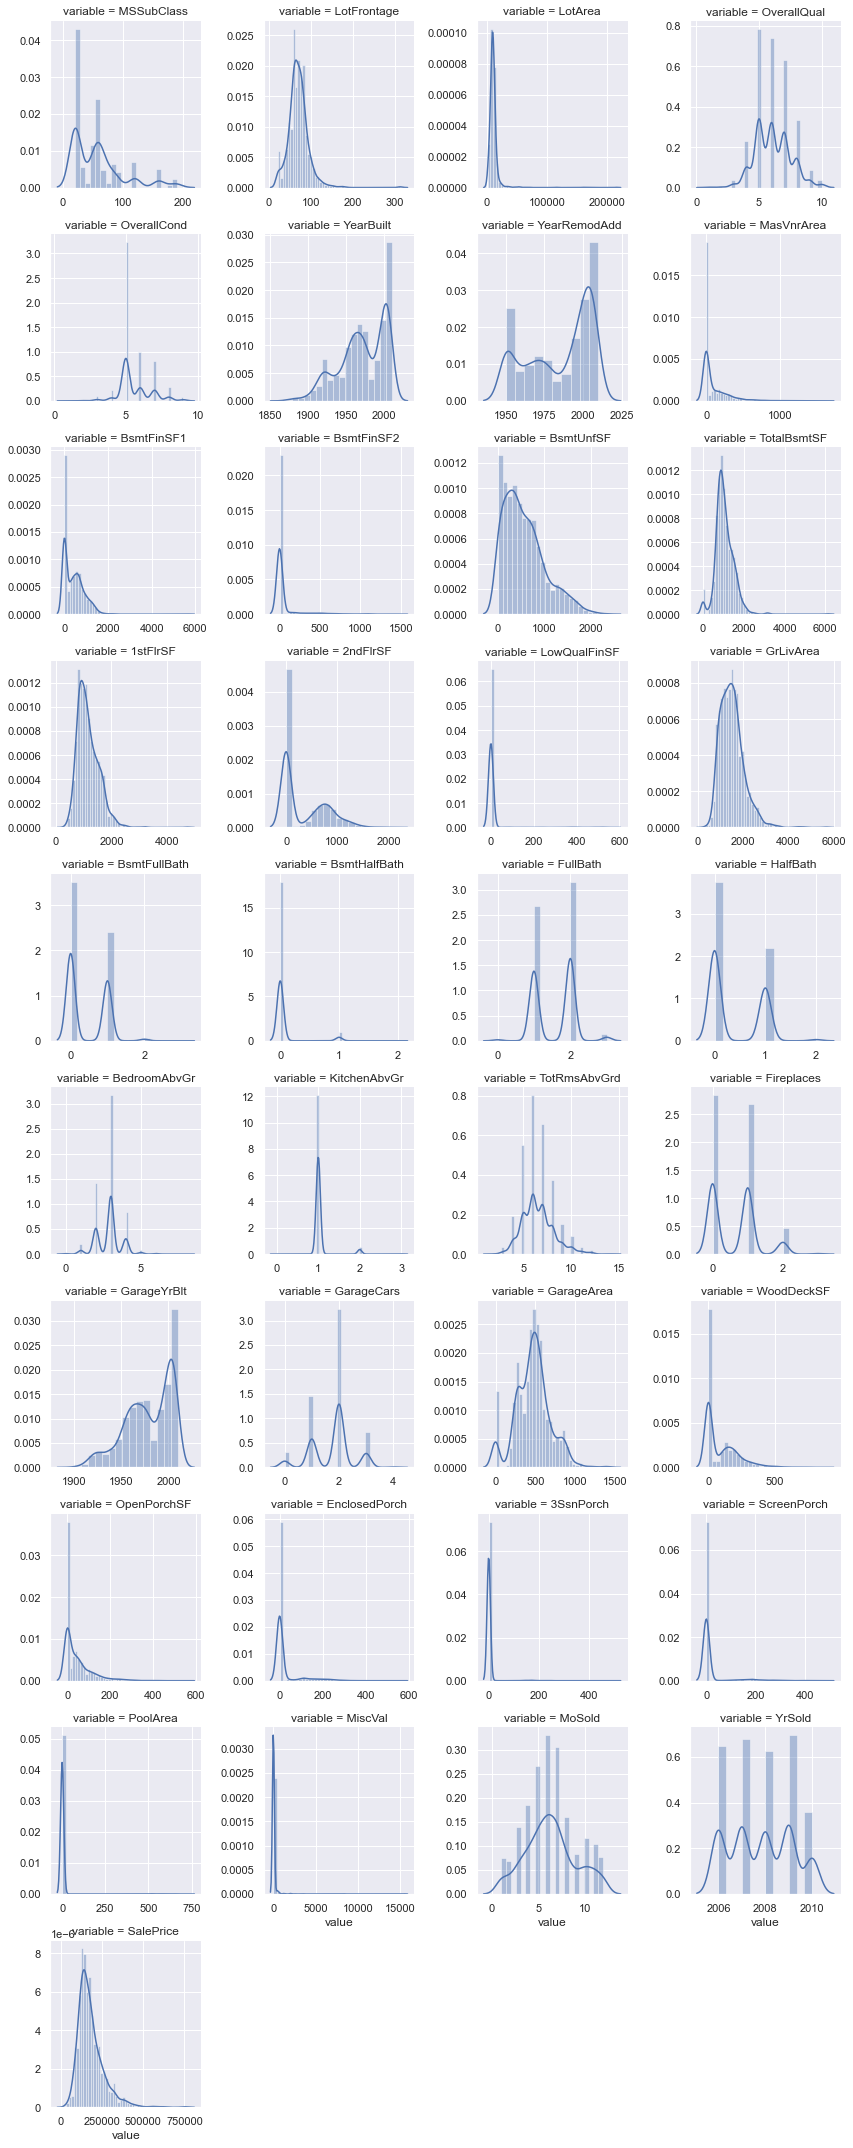

In [43]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

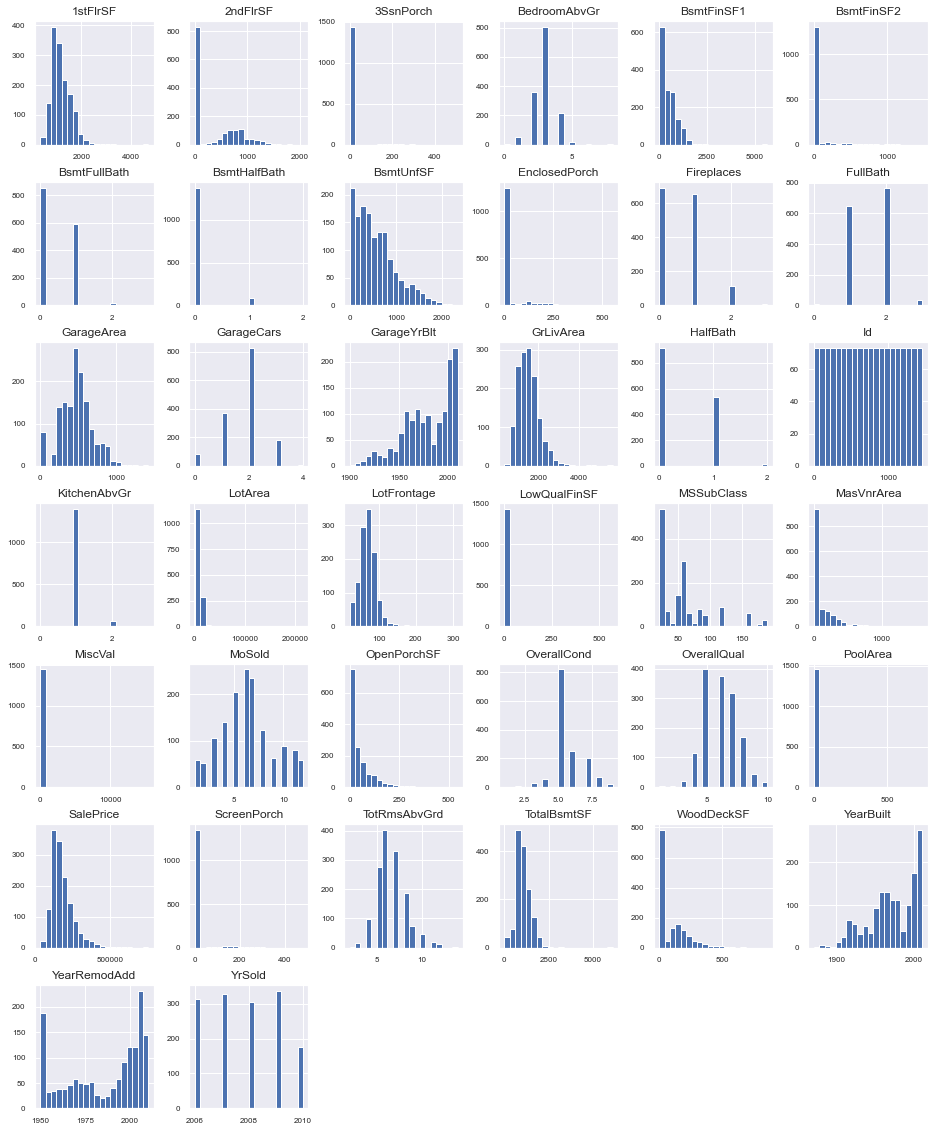

In [44]:
df_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);